<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Entr_MODE_AULA_228_DIC_27_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
750/750 [==============================] - 50s 62ms/step - loss: 0.2112 - accuracy: 0.9358 - val_loss: 0.0684 - val_accuracy: 0.9799
Epoch 2/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0550 - accuracy: 0.9824 - val_loss: 0.0659 - val_accuracy: 0.9806
Epoch 3/5
750/750 [==============================] - 46s 62ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0377 - val_accuracy: 0.9880
Epoch 4/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0646 - val_accuracy: 0.9828
Epoch 5/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0404 - val_accuracy: 0.9877


1/1 [==============================] - 0s 82ms/step
Número predicho: 8


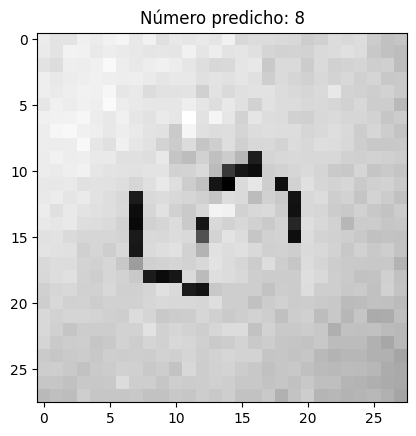

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar y preprocesar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir el modelo de la red neuronal convolucional (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/mnist_model.h5')  # Cambia la ruta según tu preferencia

# Cargar el modelo
mnist_model = tf.keras.models.load_model('/content/drive/MyDrive/mnist_model.h5')  # Cambia la ruta según tu preferencia

# Realizar predicciones en una imagen específica
img_path = '/content/drive/MyDrive/druida/cinco.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = img_array / 255.0

# Hacer la predicción
predictions = mnist_model.predict(img_array)

# Obtener el número predicho
predicted_number = tf.argmax(predictions[0]).numpy()

# Mostrar la predicción
print(f'Número predicho: {predicted_number}')
# Mostrar la predicción junto con la imagen
plt.imshow(img, cmap='gray')
plt.title(f'Número predicho: {predicted_number}')
plt.show()